# Get historical data throgh API 
# Make Api call for crypto and stock(S&P500) from Allpaca
# Make API call for comodities from barchart


In [1]:
# Limit the number of securities for each alloocation( depends on the data fed)

# Get combination of alocated assets and weighting 
# Use KMeans algorithm for clustering 
from sklearn.cluster import KMeans
# from yahoofinancials import YahooFinancials
import yfinance as yf
import numpy as np
import requests
import json
import pandas as pd
import datetime as dt

# Data collection and preparation for Stocks, Crypto, and Commodities

In [2]:
#Ask user how much is the allocation for Equity Allocation
# Check the input 
while True:
    try:
        equity_allocation = float(input('Please enter the amount of capital you wish to invest :'))
        break
    except:
        print('Please enter a numerical value.')

Please enter the amount of capital you wish to invest : 20,000


Please enter a numerical value.


Please enter the amount of capital you wish to invest : 2000


In [3]:
# Prompt the user how many years of historical data they wish to pull for the analysis
# Check the input 
while True:
    try:
        num_years = int(input('Please enter the number of years (1-10) of historical data that you wish to retrieve for the analysis :'))
        break
    except:
        print('Please enter a numerical value.'
             )

Please enter the number of years (1-10) of historical data that you wish to retrieve for the analysis : 4


In [4]:
# VARIATION 3
# Define the lists of asset classes and their respective tickers. Set it as variables, so the selection can be changed easier if neded.
api_pull = {'stocks' : ['AMZN', 'AAPL', 'TSLA', 'GOOGL', 'NVDA', 'MSFT', 'TSM', 'META','XOM', 'LAC']}

# Store data for each asset class in a dictionary
# Use .items()to iterate over the key-value pairs of the api_pull dictionary
# pull data for the number of years requested by the user
data = {}
for asset_class, tickers in api_pull.items():
    data[asset_class] = {}
    for ticker in tickers:
        data[asset_class][ticker] = yf.Ticker(ticker).history(period=f"{num_years}y")

In [5]:

# Review pulled data:
data 

{'stocks': {'AMZN':                                  Open        High        Low       Close  \
  Date                                                                       
  2019-02-19 00:00:00-05:00   80.050003   81.699997  80.028000   81.378998   
  2019-02-20 00:00:00-05:00   81.500000   81.746498  80.505997   81.105003   
  2019-02-21 00:00:00-05:00   80.992500   81.178001  80.045502   80.972000   
  2019-02-22 00:00:00-05:00   81.175003   81.747002  81.058502   81.578003   
  2019-02-25 00:00:00-05:00   82.072502   82.730003  81.519501   81.650002   
  ...                               ...         ...        ...         ...   
  2023-02-09 00:00:00-05:00  101.320000  101.779999  97.570000   98.239998   
  2023-02-10 00:00:00-05:00   97.559998   98.820000  96.230003   97.610001   
  2023-02-13 00:00:00-05:00   97.849998   99.680000  96.910004   99.540001   
  2023-02-14 00:00:00-05:00   98.410004  100.919998  97.519997   99.699997   
  2023-02-15 00:00:00-05:00   99.089996  101.1

In [6]:
# Create a data frame for each asset class with the close column
# Access the 'Close' column of the data for each asset class
# Extract the values of the data dictionary and then access the 'Close' column of each dataframe. 
df_stocks = pd.DataFrame({ticker: data['stocks'][ticker]['Close'] for ticker in api_pull['stocks']})
df_stocks

,AMZN,AAPL,TSLA,GOOGL,NVDA,MSFT,TSM,META,XOM,LAC
Date,,,,,,,,,,
2019-02-19 00:00:00-05:00,81.378998,41.358112,20.375999,56.325500,38.873066,103.628723,34.469036,162.289993,62.855190,3.160000
2019-02-20 00:00:00-05:00,81.105003,41.624268,20.170668,56.029499,39.347073,103.089951,34.952999,162.559998,63.096230,3.490000
2019-02-21 00:00:00-05:00,80.972000,41.389576,19.415333,55.210499,38.657158,105.264290,34.935078,160.039993,62.525784,3.660000
2019-02-22 00:00:00-05:00,81.578003,41.851711,19.647333,55.827999,39.505901,106.765190,35.302532,161.889999,63.007843,3.770000
2019-02-25 00:00:00-05:00,81.650002,42.156574,19.917999,55.866501,39.381813,107.361694,35.472820,164.619995,63.072124,3.760000
...,...,...,...,...,...,...,...,...,...,...
2023-02-09 00:00:00-05:00,98.239998,150.639999,207.320007,95.010002,223.369995,263.619995,96.690002,177.919998,113.476807,25.799999
2023-02-10 00:00:00-05:00,97.610001,151.009995,196.889999,94.570000,212.649994,263.100006,95.370003,174.149994,118.260002,24.549999
2023-02-13 00:00:00-05:00,99.540001,153.850006,194.639999,94.610001,217.880005,271.320007,96.110001,179.429993,117.800003,24.129999


In [7]:
# Replace all the NaN values in a data frame using the fillna() method. Create a copy of the data frames.


In [8]:

df_stocks = df_stocks.fillna(method='ffill')
df_stocks

,AMZN,AAPL,TSLA,GOOGL,NVDA,MSFT,TSM,META,XOM,LAC
Date,,,,,,,,,,
2019-02-19 00:00:00-05:00,81.378998,41.358112,20.375999,56.325500,38.873066,103.628723,34.469036,162.289993,62.855190,3.160000
2019-02-20 00:00:00-05:00,81.105003,41.624268,20.170668,56.029499,39.347073,103.089951,34.952999,162.559998,63.096230,3.490000
2019-02-21 00:00:00-05:00,80.972000,41.389576,19.415333,55.210499,38.657158,105.264290,34.935078,160.039993,62.525784,3.660000
2019-02-22 00:00:00-05:00,81.578003,41.851711,19.647333,55.827999,39.505901,106.765190,35.302532,161.889999,63.007843,3.770000
2019-02-25 00:00:00-05:00,81.650002,42.156574,19.917999,55.866501,39.381813,107.361694,35.472820,164.619995,63.072124,3.760000
...,...,...,...,...,...,...,...,...,...,...
2023-02-09 00:00:00-05:00,98.239998,150.639999,207.320007,95.010002,223.369995,263.619995,96.690002,177.919998,113.476807,25.799999
2023-02-10 00:00:00-05:00,97.610001,151.009995,196.889999,94.570000,212.649994,263.100006,95.370003,174.149994,118.260002,24.549999
2023-02-13 00:00:00-05:00,99.540001,153.850006,194.639999,94.610001,217.880005,271.320007,96.110001,179.429993,117.800003,24.129999


In [9]:
# Review first and last 10 rows for stocks assets class
display(df_stocks.head(10))
df_stocks.tail(10)

,AMZN,AAPL,TSLA,GOOGL,NVDA,MSFT,TSM,META,XOM,LAC
Date,,,,,,,,,,
2019-02-19 00:00:00-05:00,81.378998,41.358112,20.375999,56.325500,38.873066,103.628723,34.469036,162.289993,62.855190,3.16
2019-02-20 00:00:00-05:00,81.105003,41.624268,20.170668,56.029499,39.347073,103.089951,34.952999,162.559998,63.096230,3.49
2019-02-21 00:00:00-05:00,80.972000,41.389576,19.415333,55.210499,38.657158,105.264290,34.935078,160.039993,62.525784,3.66
2019-02-22 00:00:00-05:00,81.578003,41.851711,19.647333,55.827999,39.505901,106.765190,35.302532,161.889999,63.007843,3.77
2019-02-25 00:00:00-05:00,81.650002,42.156574,19.917999,55.866501,39.381813,107.361694,35.472820,164.619995,63.072124,3.76
2019-02-26 00:00:00-05:00,81.820000,42.180779,19.857332,56.100498,38.987221,108.102501,35.490738,164.130005,63.200672,3.61
2019-02-27 00:00:00-05:00,82.054497,42.311432,20.982668,56.144501,38.567818,107.919731,35.356300,162.809998,63.851501,3.64
2019-02-28 00:00:00-05:00,81.991501,41.895260,21.325333,56.327499,38.321877,107.785019,34.997810,161.449997,63.497955,3.70
2019-03-01 00:00:00-05:00,83.586502,42.335636,19.652666,57.425999,38.865925,108.266075,35.302532,162.279999,64.277328,3.73


,AMZN,AAPL,TSLA,GOOGL,NVDA,MSFT,TSM,META,XOM,LAC
Date,,,,,,,,,,
2023-02-02 00:00:00-05:00,112.910004,150.590088,188.270004,107.739998,217.089996,264.600006,96.650002,188.770004,110.301247,24.959999
2023-02-03 00:00:00-05:00,103.389999,154.264465,189.979996,104.779999,211.000000,258.350006,94.660004,186.529999,111.065361,24.320000
2023-02-06 00:00:00-05:00,102.180000,151.498688,194.759995,102.900002,210.889999,256.769989,91.830002,186.059998,110.876816,23.459999
2023-02-07 00:00:00-05:00,102.110001,154.414230,196.809998,107.639999,221.729996,267.559998,94.550003,191.619995,114.042458,25.889999
2023-02-08 00:00:00-05:00,100.050003,151.688400,201.289993,99.370003,222.050003,266.730011,94.279999,183.429993,113.050087,25.540001
2023-02-09 00:00:00-05:00,98.239998,150.639999,207.320007,95.010002,223.369995,263.619995,96.690002,177.919998,113.476807,25.799999
2023-02-10 00:00:00-05:00,97.610001,151.009995,196.889999,94.570000,212.649994,263.100006,95.370003,174.149994,118.260002,24.549999
2023-02-13 00:00:00-05:00,99.540001,153.850006,194.639999,94.610001,217.880005,271.320007,96.110001,179.429993,117.800003,24.129999
2023-02-14 00:00:00-05:00,99.699997,153.199997,209.250000,94.680000,229.710007,272.170013,97.959999,179.479996,116.419998,24.879999


In [10]:
#Run montecarlo model

In [11]:
df_stocks.index = pd.to_datetime(df_stocks.index)
df_stocks.index = df_stocks.index.tz_convert('UTC')

In [12]:
portfolio_data = pd.concat([df_stocks], axis=1)
# pd.merge(df1,df2, how='inner') ⭐️used to merge assets when ready⭐️
portfolio_data

,AMZN,AAPL,TSLA,GOOGL,NVDA,MSFT,TSM,META,XOM,LAC
Date,,,,,,,,,,
2019-02-19 05:00:00+00:00,81.378998,41.358112,20.375999,56.325500,38.873066,103.628723,34.469036,162.289993,62.855190,3.160000
2019-02-20 05:00:00+00:00,81.105003,41.624268,20.170668,56.029499,39.347073,103.089951,34.952999,162.559998,63.096230,3.490000
2019-02-21 05:00:00+00:00,80.972000,41.389576,19.415333,55.210499,38.657158,105.264290,34.935078,160.039993,62.525784,3.660000
2019-02-22 05:00:00+00:00,81.578003,41.851711,19.647333,55.827999,39.505901,106.765190,35.302532,161.889999,63.007843,3.770000
2019-02-25 05:00:00+00:00,81.650002,42.156574,19.917999,55.866501,39.381813,107.361694,35.472820,164.619995,63.072124,3.760000
...,...,...,...,...,...,...,...,...,...,...
2023-02-09 05:00:00+00:00,98.239998,150.639999,207.320007,95.010002,223.369995,263.619995,96.690002,177.919998,113.476807,25.799999
2023-02-10 05:00:00+00:00,97.610001,151.009995,196.889999,94.570000,212.649994,263.100006,95.370003,174.149994,118.260002,24.549999
2023-02-13 05:00:00+00:00,99.540001,153.850006,194.639999,94.610001,217.880005,271.320007,96.110001,179.429993,117.800003,24.129999


In [13]:
# portfolio_data = portfolio_data.fillna(method='ffill')

In [14]:
portfolio_data_daily_ret = portfolio_data.pct_change(1).dropna()
portfolio_data_daily_ret.head()

,AMZN,AAPL,TSLA,GOOGL,NVDA,MSFT,TSM,META,XOM,LAC
Date,,,,,,,,,,
2019-02-20 05:00:00+00:00,-0.003367,0.006435,-0.010077,-0.005255,0.012194,-0.005199,0.014041,0.001664,0.003835,0.104430
2019-02-21 05:00:00+00:00,-0.001640,-0.005638,-0.037447,-0.014617,-0.017534,0.021092,-0.000513,-0.015502,-0.009041,0.048711
2019-02-22 05:00:00+00:00,0.007484,0.011166,0.011949,0.011184,0.021956,0.014258,0.010518,0.011560,0.007710,0.030055
2019-02-25 05:00:00+00:00,0.000883,0.007284,0.013776,0.000690,-0.003141,0.005587,0.004824,0.016863,0.001020,-0.002653
2019-02-26 05:00:00+00:00,0.002082,0.000574,-0.003046,0.004189,-0.010020,0.006900,0.000505,-0.002976,0.002038,-0.039894


In [15]:
# ## Prepare the data for Monte Carlo simulation
# returns = portfolio_data.pct_change() #Calculate returns for each asset
# mean_return = returns.mean()
# cov_matrix = returns.cov()

In [16]:
mean_daily_ret = portfolio_data.pct_change(1).mean()
mean_daily_ret

AMZN     0.000474
AAPL     0.001547
TSLA     0.003257
GOOGL    0.000753
NVDA     0.002302
MSFT     0.001152
TSM      0.001256
META     0.000512
XOM      0.000873
LAC      0.003364
dtype: float64

In [17]:
portfolio_data.pct_change(1).corr()

,AMZN,AAPL,TSLA,GOOGL,NVDA,MSFT,TSM,META,XOM,LAC
AMZN,1.000000,0.644072,0.447753,0.669660,0.645069,0.702446,0.484302,0.617099,0.193737,0.342176
AAPL,0.644072,1.000000,0.498998,0.698194,0.698144,0.780219,0.580841,0.600608,0.335349,0.386351
TSLA,0.447753,0.498998,1.000000,0.417885,0.538539,0.473894,0.429694,0.348701,0.186511,0.435566
GOOGL,0.669660,0.698194,0.417885,1.000000,0.668440,0.799222,0.539377,0.683207,0.349877,0.365285
NVDA,0.645069,0.698144,0.538539,0.668440,1.000000,0.741233,0.665353,0.571156,0.280806,0.461948
MSFT,0.702446,0.780219,0.473894,0.799222,0.741233,1.000000,0.567298,0.635190,0.323863,0.371849
TSM,0.484302,0.580841,0.429694,0.539377,0.665353,0.567298,1.000000,0.437534,0.337994,0.427210
META,0.617099,0.600608,0.348701,0.683207,0.571156,0.635190,0.437534,1.000000,0.203480,0.324575
XOM,0.193737,0.335349,0.186511,0.349877,0.280806,0.323863,0.337994,0.203480,1.000000,0.305659
LAC,0.342176,0.386351,0.435566,0.365285,0.461948,0.371849,0.427210,0.324575,0.305659,1.000000


In [18]:
portfolio_data.head()

,AMZN,AAPL,TSLA,GOOGL,NVDA,MSFT,TSM,META,XOM,LAC
Date,,,,,,,,,,
2019-02-19 05:00:00+00:00,81.378998,41.358112,20.375999,56.325500,38.873066,103.628723,34.469036,162.289993,62.855190,3.16
2019-02-20 05:00:00+00:00,81.105003,41.624268,20.170668,56.029499,39.347073,103.089951,34.952999,162.559998,63.096230,3.49
2019-02-21 05:00:00+00:00,80.972000,41.389576,19.415333,55.210499,38.657158,105.264290,34.935078,160.039993,62.525784,3.66
2019-02-22 05:00:00+00:00,81.578003,41.851711,19.647333,55.827999,39.505901,106.765190,35.302532,161.889999,63.007843,3.77
2019-02-25 05:00:00+00:00,81.650002,42.156574,19.917999,55.866501,39.381813,107.361694,35.472820,164.619995,63.072124,3.76


In [19]:
log_ret = np.log(portfolio_data/portfolio_data.shift(1)).dropna()
log_ret.head()

,AMZN,AAPL,TSLA,GOOGL,NVDA,MSFT,TSM,META,XOM,LAC
Date,,,,,,,,,,
2019-02-20 05:00:00+00:00,-0.003373,0.006415,-0.010128,-0.005269,0.012120,-0.005213,0.013943,0.001662,0.003828,0.099330
2019-02-21 05:00:00+00:00,-0.001641,-0.005654,-0.038166,-0.014725,-0.017690,0.020872,-0.000513,-0.015623,-0.009082,0.047561
2019-02-22 05:00:00+00:00,0.007456,0.011104,0.011879,0.011122,0.021718,0.014158,0.010463,0.011493,0.007680,0.029612
2019-02-25 05:00:00+00:00,0.000882,0.007258,0.013682,0.000689,-0.003146,0.005572,0.004812,0.016723,0.001020,-0.002656
2019-02-26 05:00:00+00:00,0.002080,0.000574,-0.003050,0.004180,-0.010070,0.006876,0.000505,-0.002981,0.002036,-0.040711


In [20]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AMZN,1006.0,0.000216,0.022742,-0.151398,-0.011032,0.000837,0.011466,0.126949
AAPL,1006.0,0.001315,0.021496,-0.137708,-0.009152,0.001448,0.013340,0.113158
TSLA,1006.0,0.002339,0.042819,-0.236518,-0.018532,0.002213,0.023595,0.181445
GOOGL,1006.0,0.000540,0.020684,-0.123685,-0.008509,0.001080,0.010967,0.091852
NVDA,1006.0,0.001757,0.032968,-0.203979,-0.015817,0.002859,0.019804,0.158340
MSFT,1006.0,0.000949,0.020110,-0.159454,-0.008609,0.001093,0.011104,0.132929
TSM,1006.0,0.000984,0.023290,-0.151219,-0.012050,0.000718,0.013522,0.119135
META,1006.0,0.000087,0.029377,-0.306391,-0.012150,0.000913,0.014418,0.209307
XOM,1006.0,0.000610,0.022943,-0.130391,-0.011026,0.000446,0.012095,0.119442
LAC,1006.0,0.002055,0.050953,-0.242974,-0.026441,-0.001972,0.030201,0.267261


In [21]:
# Compute pairwise covariance of columns
log_ret.cov()

,AMZN,AAPL,TSLA,GOOGL,NVDA,MSFT,TSM,META,XOM,LAC
AMZN,0.000517,0.000316,0.000439,0.000316,0.000486,0.000322,0.000258,0.000410,0.000104,0.000404
AAPL,0.000316,0.000462,0.000468,0.000312,0.000498,0.000338,0.000293,0.000375,0.000169,0.000432
TSLA,0.000439,0.000468,0.001833,0.000376,0.000771,0.000416,0.000435,0.000439,0.000192,0.000966
GOOGL,0.000316,0.000312,0.000376,0.000428,0.000459,0.000333,0.000262,0.000410,0.000168,0.000391
NVDA,0.000486,0.000498,0.000771,0.000459,0.001087,0.000494,0.000515,0.000548,0.000217,0.000790
MSFT,0.000322,0.000338,0.000416,0.000333,0.000494,0.000404,0.000268,0.000372,0.000153,0.000390
TSM,0.000258,0.000293,0.000435,0.000262,0.000515,0.000268,0.000542,0.000298,0.000183,0.000515
META,0.000410,0.000375,0.000439,0.000410,0.000548,0.000372,0.000298,0.000863,0.000139,0.000489
XOM,0.000104,0.000169,0.000192,0.000168,0.000217,0.000153,0.000183,0.000139,0.000526,0.000368
LAC,0.000404,0.000432,0.000966,0.000391,0.000790,0.000390,0.000515,0.000489,0.000368,0.002596


In [22]:
log_ret.cov()*252 # multiply by days

,AMZN,AAPL,TSLA,GOOGL,NVDA,MSFT,TSM,META,XOM,LAC
AMZN,0.130335,0.079608,0.110590,0.079659,0.122590,0.081118,0.064896,0.103278,0.026191,0.101823
AAPL,0.079608,0.116440,0.118033,0.078664,0.125621,0.085271,0.073864,0.094497,0.042559,0.108855
TSLA,0.110590,0.118033,0.462034,0.094812,0.194170,0.104765,0.109720,0.110526,0.048450,0.243407
GOOGL,0.079659,0.078664,0.094812,0.107814,0.115559,0.083972,0.065984,0.103348,0.042345,0.098514
NVDA,0.122590,0.125621,0.194170,0.115559,0.273901,0.124551,0.129682,0.138064,0.054663,0.199177
MSFT,0.081118,0.085271,0.104765,0.083972,0.124551,0.101912,0.067524,0.093647,0.038493,0.098287
TSM,0.064896,0.073864,0.109720,0.065984,0.129682,0.067524,0.136691,0.075119,0.046174,0.129656
META,0.103278,0.094497,0.110526,0.103348,0.138064,0.093647,0.075119,0.217483,0.034969,0.123247
XOM,0.026191,0.042559,0.048450,0.042345,0.054663,0.038493,0.046174,0.034969,0.132652,0.092814
LAC,0.101823,0.108855,0.243407,0.098514,0.199177,0.098287,0.129656,0.123247,0.092814,0.654233


In [23]:
# Set seed (optional)
np.random.seed(101)

# Stock Columns
print('portfolio_data')
print(portfolio_data.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(10))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')
# log_ret.mean()
# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)

portfolio_data
Index(['AMZN', 'AAPL', 'TSLA', 'GOOGL', 'NVDA', 'MSFT', 'TSM', 'META', 'XOM',
       'LAC'],
      dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166 0.68527698 0.83389686
 0.30696622 0.89361308 0.72154386 0.18993895]


Rebalance to sum to 1.0
[0.10499539 0.11602948 0.00578945 0.03487419 0.13933214 0.16954988
 0.0624131  0.18169153 0.14670601 0.03861884]


Expected Portfolio Return
0.21660059602643641


Expected Volatility
0.31207118569358205


Sharpe Ratio
0.6940743200787312


In [24]:
num_ports = 15000

all_weights = np.zeros((num_ports,len(portfolio_data.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(10))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [25]:
sharpe_arr.max()

1.0114020253082772

In [26]:
sharpe_arr.argmax()

10159

In [27]:
all_weights[874,:]

array([0.05722729, 0.14368187, 0.21128851, 0.02632141, 0.22908986,
       0.1588382 , 0.13608507, 0.00063149, 0.02284941, 0.01398688])

In [28]:
max_sr_ret = ret_arr[874]
max_sr_vol = vol_arr[874]

In [29]:
print(portfolio_data.isna().sum())

AMZN     0
AAPL     0
TSLA     0
GOOGL    0
NVDA     0
MSFT     0
TSM      0
META     0
XOM      0
LAC      0
dtype: int64


In [30]:
# # ⭐️OTHER MONTE CARLO EXAMPLE⭐️

# # Prepare the data for Monte Carlo simulation
# returns = portfolio_data.pct_change() # Calculate returns for each asset
# mean_return = returns.mean()
# cov_matrix = returns.cov()

# # Set the number of simulations and trading days
# num_simulations = 1000
# stocks_n_comodities_num_trading_days = 252*10
# #crypto_num_trading_days = 365

# # Create an empty array to hold the simulation results
# simulation_results = np.zeros((num_simulations, len(portfolio_data.columns)))

# # Loop over the number of simulations
# for i in range(num_simulations):
# #     # Generate random daily returns for each asset
#      daily_returns = np.random.multivariate_normal(mean_return, cov_matrix, stocks_n_comodities_num_trading_days)
#      # Calculate the cumulative returns over the simulation period
#      simulation_returns = (1 + daily_returns).cumprod(axis=0)
#      # Calculate the final portfolio value for each simulation
#      portfolio_values = simulation_returns[-1] * portfolio_data.iloc[-1]
#      # Save the portfolio values for this simulation
#      simulation_results[i, :] = portfolio_values

# # Calculate the mean and standard deviation of the simulation results
# mean_portfolio_values = simulation_results.mean(axis=0)
# std_portfolio_values = simulation_results.std(axis=0)

# # Print the results
# print(f"Expected portfolio value: $", round(mean_portfolio_values.sum(), 2))

In [31]:
eigvals, _ = np.linalg.eig(cov_matrix)
print(eigvals)

NameError: name 'cov_matrix' is not defined

In [ ]:
#Ask user how much is the allocation for Equity Allocation
# Check the input 
while True:
    try:
        equity_alloc = int(input('max equity'))
        break
    except:
        print('thats not an integer')


In [ ]:
# #Ask user how much is the allocation for Commodity Allocation
# # Check the input 
# while True:
#     try:
#         commodity_alloc = int(input('max commodity'))
#         break
#     except:
#         print('thats not an integer')


In [ ]:
# #Ask user how much is the allocation for Crypto Allocation
# # Check the input 
# while True:
#     try:
#         crypto_alloc = int(input('max crypto'))
#         break
#     except:
#         print('thats not an integer')


In [ ]:
#Data from 3 assets with their weight amounts
#Limit each equity t0 allocate 10 items 
# assets = {'equity':range(0,equity_alloc,10),'commodity':range(0,commodity_alloc,10),'crypto':range(0,crypto_alloc,10)}
assets = {'equity':range(0,equity_alloc,10)}
assets

In [ ]:
# #Allowing only 3 cluster of assets 
# kmeans = KMeans(n_clusters=3)



In [ ]:
# #Fit the model to the asset data 
# kmeans.fit(assets)



In [ ]:
# Plot vizualization fort the clusters 

In [32]:
import matplotlib.pyplot as plt

In [33]:
slices = all_weights[874,:] # weights of asset list, input weights from monte carlo data, using for loop TBD.
portfolio_data = portfolio_data.columns # asset list
cols = ['c','b','g'] # color list in in order of above assets

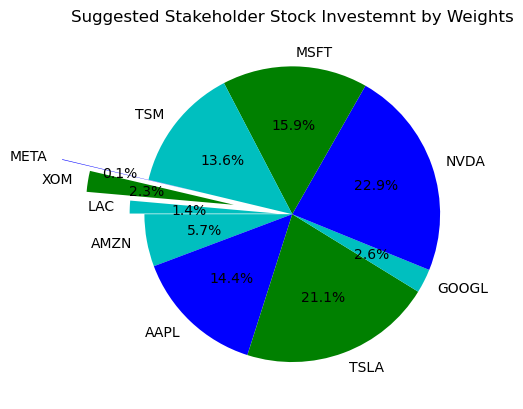

In [41]:
plt.pie(slices,
        labels = portfolio_data,
        colors = cols,
        startangle = 180,
        shadow = False,
        explode =(0,0,0,0,0,0,0,0.6,0.4,0.1),
        autopct = '%1.1f%%'
) # sets up the pie chart with descriptions

plt.title('Suggested Stakeholder Stock Investemnt by Weights')
plt.show()